# Assignment - 04

In [1]:
# import the libraries
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # Loading the Data set

# Displaying No of test and training samples
print('x_train: ', x_train.shape)  
print('x_test: ', x_test.shape)

K = len(np.unique(y_train)) # 10 Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)


# Question 1
 (a) Implement gradient descent and run for 300 epochs.

In [58]:
std=1e-5
w1 = std*np.random.randn(Din, K) # Initializing the weight matrix with random values
b1 = np.zeros(K) # Initializing bias as zeros
print("w1:", w1.shape)
print("b1:", b1.shape)

batch_size = Ntr
iterations = 300   # Run for 300 epochs
lr = 1.4e-2       # Learning Rate
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(1,iterations+1):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    y_pred=x.dot(w1)+b1
    loss=1/batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1)
    loss_history.append(loss)

    if t%20==0:
        print('iteration %d/%d : loss %f'%(t,iterations,loss))


    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    db1=dy_pred.sum()
    dw1=x.T.dot(dy_pred)+reg*w1
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

w1: (3072, 10)
b1: (10,)
iteration 20/300 : loss 0.810758
iteration 40/300 : loss 0.801897
iteration 60/300 : loss 0.797421
iteration 80/300 : loss 0.794461
iteration 100/300 : loss 0.792253
iteration 120/300 : loss 0.790506
iteration 140/300 : loss 0.789078
iteration 160/300 : loss 0.787883
iteration 180/300 : loss 0.786867
iteration 200/300 : loss 0.785990
iteration 220/300 : loss 0.785222
iteration 240/300 : loss 0.784544
iteration 260/300 : loss 0.783939
iteration 280/300 : loss 0.783395
iteration 300/300 : loss 0.782901


AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

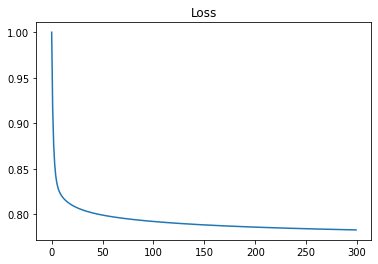

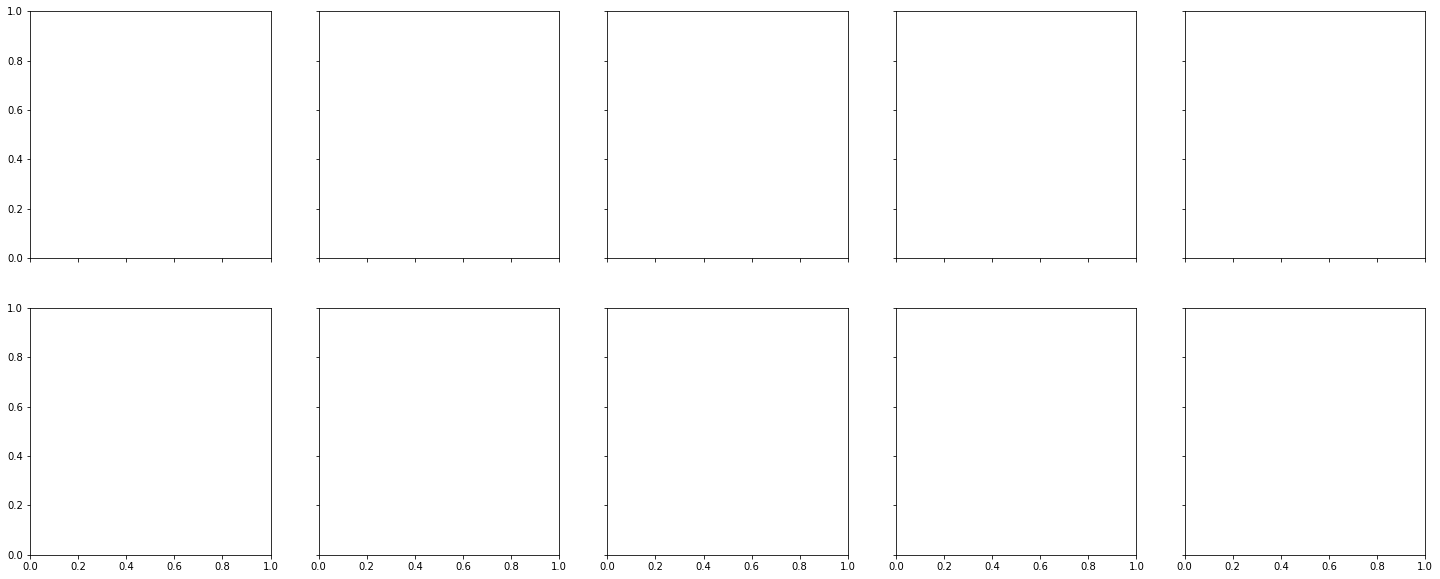

In [63]:
# Printing accuracies and displaying w as images
plt.plot(loss_history)
plt.title('Loss')
fig,ax=plt.subplots(2,5,sharex='all', sharey='all', figsize=(25,10))

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
    plt.show()

In [64]:
y_pred1 = x_train.dot(w1)+b1
train_acc = 1.0-1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))).sum()
print('train_accuracy = ',train_acc)

y_pred2=x_test.dot(w1)+b1
test_acc=1.0-1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))).sum()
print('test_accuracy = ',test_acc)

train_accuracy =  0.7554111111111111
test_accuracy =  0.7489444444444444


# Question 2

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # Loading the Data set

# Displaying No of test and training samples
print('x_train: ', x_train.shape)  
print('x_test: ', x_test.shape)

K = len(np.unique(y_train)) # 10 Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

x_train:  (50000, 32, 32, 3)
x_test:  (10000, 32, 32, 3)


In [4]:
H = 200 # No of hidden layers which is mentioned in the question
std = 1e-5
w1 = std*np.random.randn(Din,H)
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print('w1:',w1.shape)
print('b1:',b1.shape)
print('w2:',w2.shape)
print('b2:',b2.shape)

batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay = 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1)))
    y_pred = h.dot(w2) + b2
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg * (np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    if t%20==0:
        print('iteration %d/%d : loss %f'%(t,iterations,loss))

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis = 0)
    dh = dy_pred.dot(w2.T)
    db1 = (dh*h*(1-h)).sum(axis = 0)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    lr *= lr_decay


w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0/300 : loss 1.000040
iteration 20/300 : loss 0.900078
iteration 40/300 : loss 0.900042
iteration 60/300 : loss 0.900018
iteration 80/300 : loss 0.900033
iteration 100/300 : loss 0.900001
iteration 120/300 : loss 0.900029
iteration 140/300 : loss 0.900019
iteration 160/300 : loss 0.900034
iteration 180/300 : loss 0.900097
iteration 200/300 : loss 0.899988
iteration 220/300 : loss 0.900026
iteration 240/300 : loss 0.899987
iteration 260/300 : loss 0.900008
iteration 280/300 : loss 0.900006


# Question 4
Construct a CNN using Keras.models.Sequential

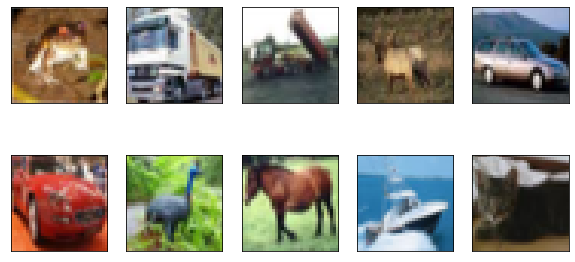

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # Loading the Data set

classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Track']

plt.figure(figsize = (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

#Data reshape
x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))

#Data Normalization
x_train = x_train / 255.
x_test = x_test / 255.

# Create Model architecture
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

(a) Learnable parameters = 73418

In [4]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.09)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= sgd,
              metrics=["accuracy"])

(b)
The constant learning rate is the default schedule and no momentum is used by default in all Keras Optimizers.Here, I have used the SGD optimizer, the learning rate defaults to 0.01.To use a custom learning rate and momentum, simply instantiate an SGD optimizer and pass 'learning_rate=0.01' and 'momentum = 0.09' as the arguments.

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.09)

So,
Learning rate = 0.01
Momentum = 0.09

In [6]:
model_history = model.fit(x_train, y_train, epochs=30,batch_size= 50,
                    validation_data=(x_test, y_test))

Epoch 1/30
1000/1000 [==============================] - 35s 35ms/step - loss: 1.6730 - accuracy: 0.3947 - val_loss: 1.6665 - val_accuracy: 0.3943
Epoch 2/30
1000/1000 [==============================] - 43s 43ms/step - loss: 1.5416 - accuracy: 0.4430 - val_loss: 1.5152 - val_accuracy: 0.4614
Epoch 3/30
1000/1000 [==============================] - 39s 39ms/step - loss: 1.4525 - accuracy: 0.4777 - val_loss: 1.4092 - val_accuracy: 0.4937
Epoch 4/30
1000/1000 [==============================] - 37s 37ms/step - loss: 1.3792 - accuracy: 0.5069 - val_loss: 1.3664 - val_accuracy: 0.5113
Epoch 5/30
1000/1000 [==============================] - 37s 37ms/step - loss: 1.3183 - accuracy: 0.5313 - val_loss: 1.2869 - val_accuracy: 0.5437
Epoch 6/30
1000/1000 [==============================] - 38s 38ms/step - loss: 1.2620 - accuracy: 0.5546 - val_loss: 1.2353 - val_accuracy: 0.5615
Epoch 7/30
1000/1000 [==============================] - 41s 41ms/step - loss: 1.2131 - accuracy: 0.5741 - val_loss: 1.2344 -

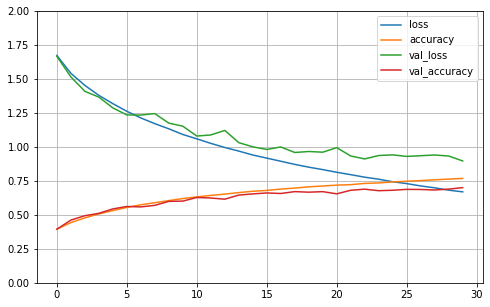

In [11]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

(c)

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Testing loss : ',test_loss)
print('Testing accuracy: ', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.8967 - accuracy: 0.7002
Testing loss :  0.8966972827911377
Testing accuracy:  0.7002000212669373
